# Machine Learning - Assignment1

## Import Libraries

In [5]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Question 1

### Download Data

In [6]:
file_id = '1HAAdP4rtI2EkJS_867XHMajXxY6z0sRU' 
url = f'https://drive.google.com/uc?id={file_id}' 
 
df = pd.read_csv(url)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Train Regression Tree

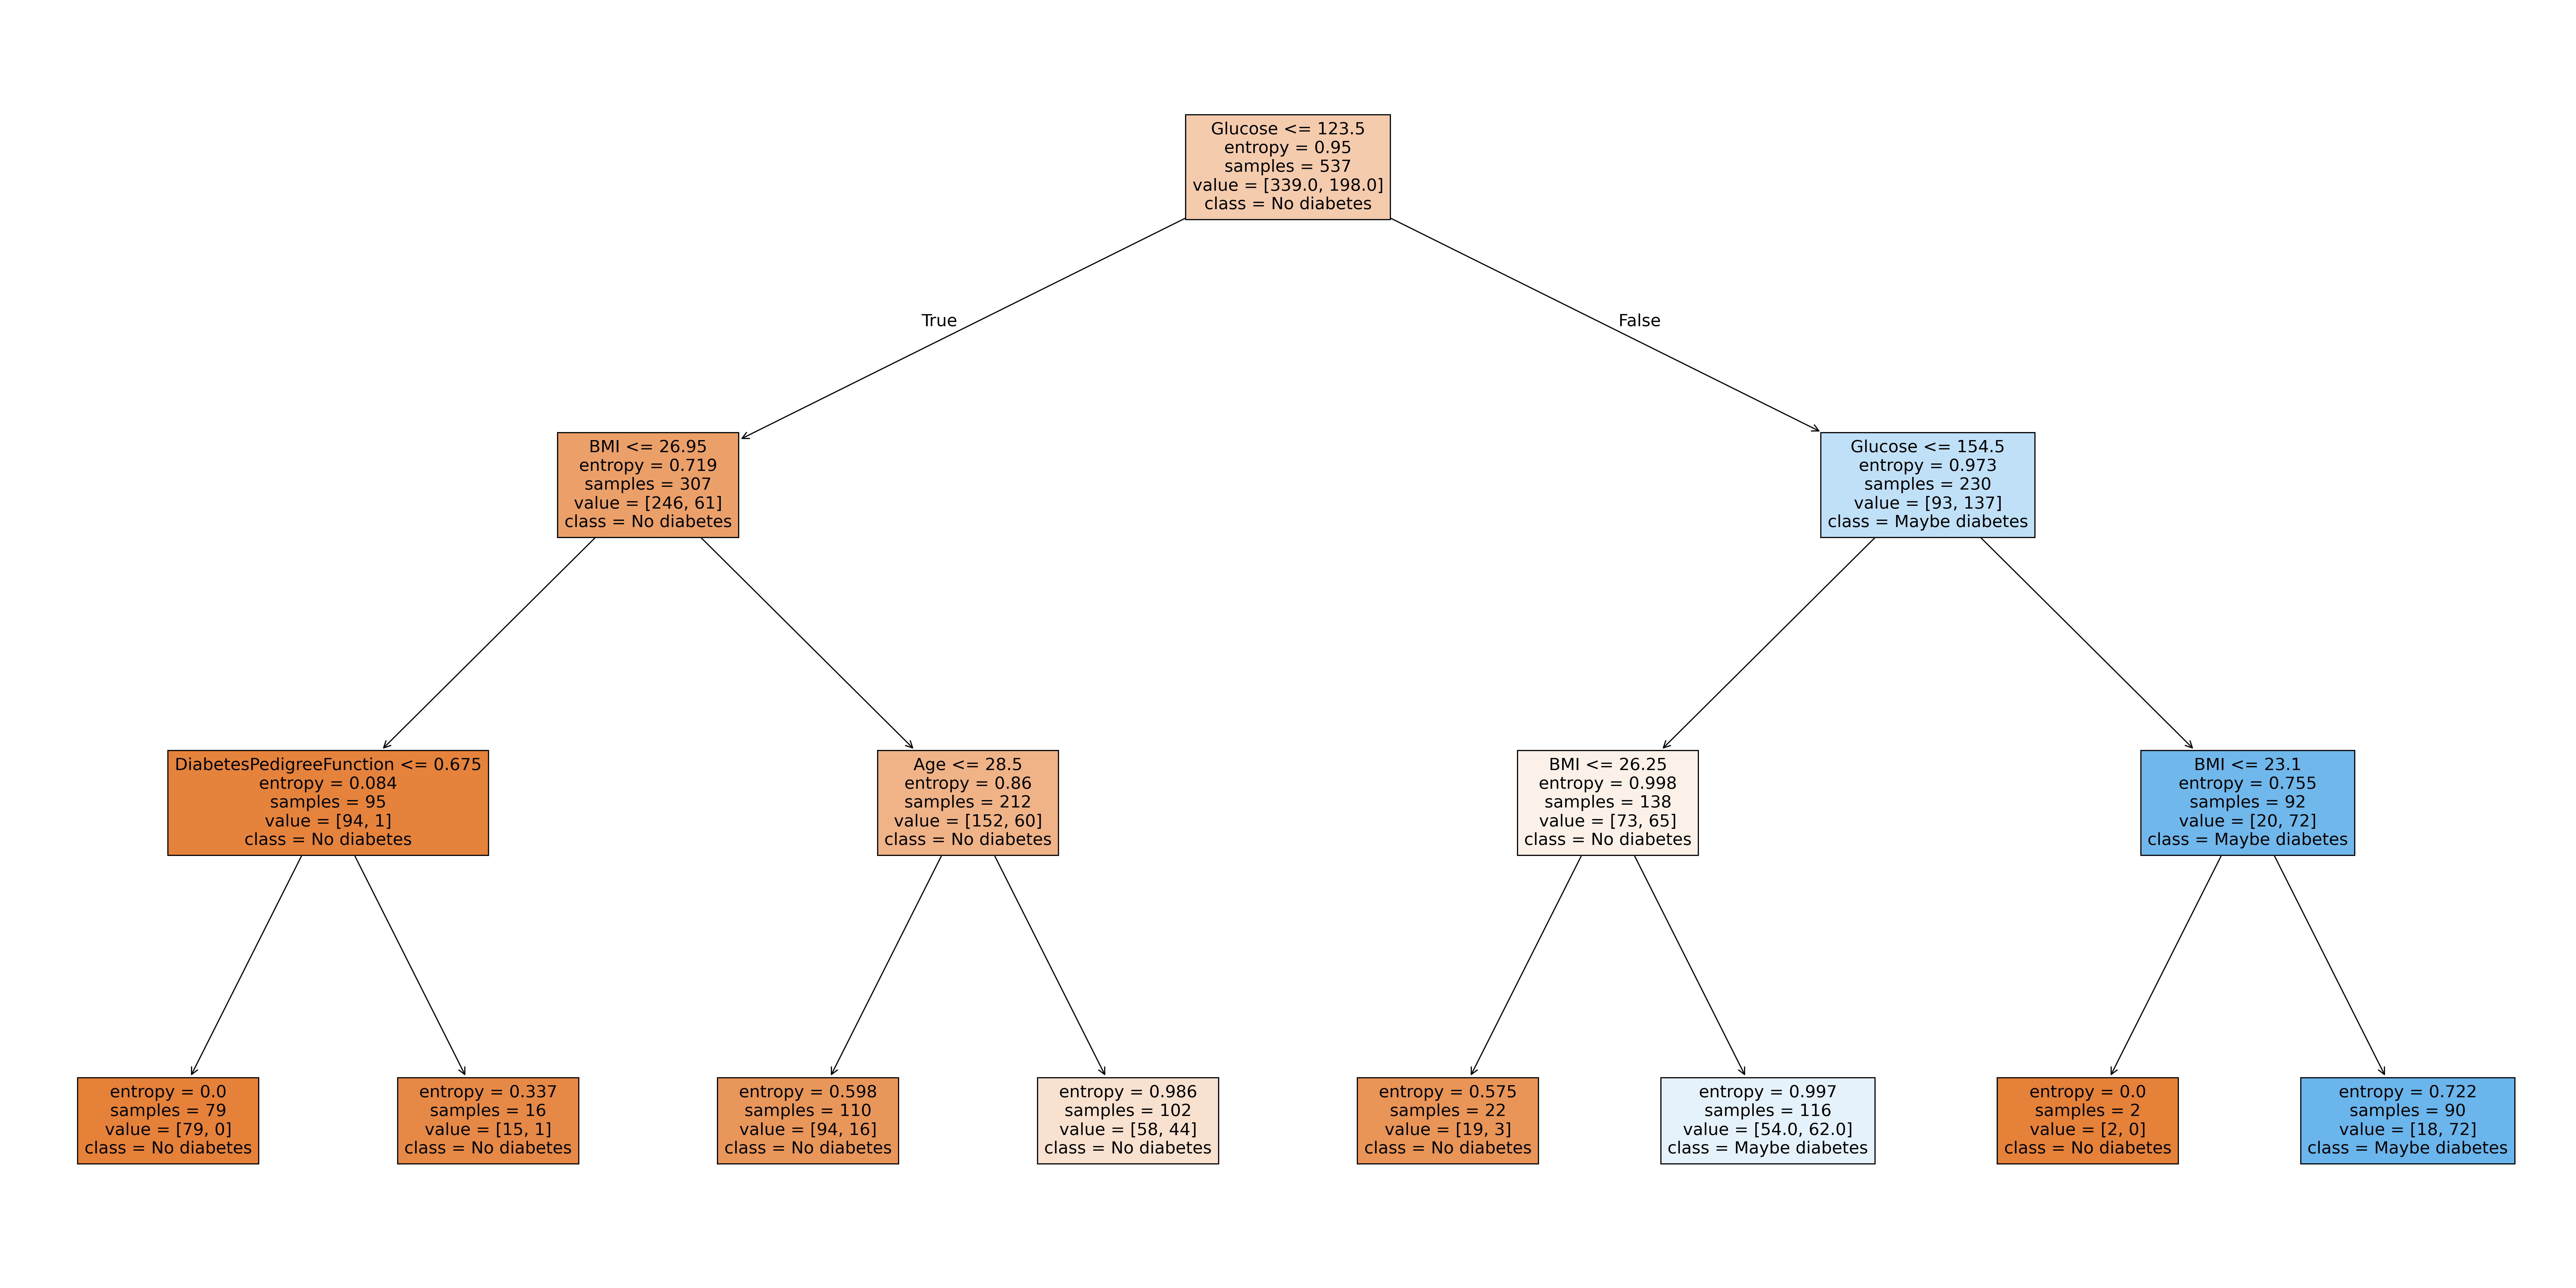

In [10]:
decision_tree = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
target = 'Outcome'
features = [
    'Pregnancies', 
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin', 
    'BMI', 
    'DiabetesPedigreeFunction', 
    'Age'
    ]

x = df[features]
y = df[target]
# 70% training. 30% validation and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

decision_tree = decision_tree.fit(x_train, y_train)
plt.figure(figsize=(40, 20), dpi=300)
tree.plot_tree(decision_tree, feature_names=features, class_names=['No diabetes','Maybe diabetes'], filled=True)
plt.show()

### Test Tree

In [11]:
y_prediction = decision_tree.predict(x_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_prediction))

Accuracy: 0.7705627705627706


### Test Different Hyper-parameter

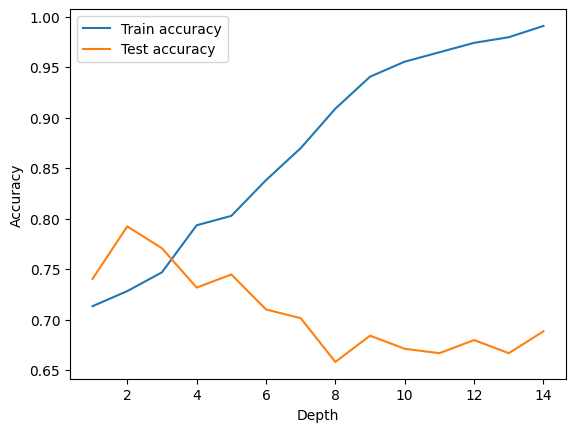

In [17]:
depth = list(range(1, 15))
train_accuracy = []
test_accuracy = []
for d in depth:
    decision_tree = tree.DecisionTreeClassifier(max_depth=d, criterion='entropy')
    decision_tree = decision_tree.fit(x_train, y_train)
    y_test_prediction = decision_tree.predict(x_test)
    y_train_prediction = decision_tree.predict(x_train)
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_prediction))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_prediction))
    # print(f'Accuracy on train for depth {d}:', train_accuracy[-1])
    # print(f'Accuracy on test for depth {d}:', test_accuracy[-1])
    # print('---')

# plot depth, train and test accuracy
plt.plot(depth, train_accuracy, label='Train accuracy')
plt.plot(depth, test_accuracy, label='Test accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()